In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('med_staff_data.csv')

In [3]:
df.head()

,Country,Year,Medical doctors (per 10 000 population),Medical doctors (number),Generalist medical practitioners (number),Specialist medical practitioners (number),Medical doctors not further defined (number)
0,Afghanistan,2016,2.782,9842.0,NaN,NaN,9842.0
1,Afghanistan,2015,2.850,9808.0,NaN,NaN,9808.0
2,Afghanistan,2014,2.983,9954.0,NaN,NaN,9954.0
3,Afghanistan,2013,2.846,9184.0,NaN,NaN,9184.0
4,Afghanistan,2012,2.414,7521.0,NaN,NaN,7521.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country                                       2848 non-null   object 
 1   Year                                          2848 non-null   int64  
 2   Medical doctors (per 10 000 population)       2563 non-null   float64
 3   Medical doctors (number)                      2785 non-null   float64
 4   Generalist medical practitioners (number)     1127 non-null   float64
 5   Specialist medical practitioners (number)     1103 non-null   float64
 6   Medical doctors not further defined (number)  2321 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 155.9+ KB


In [5]:
df.describe()

,Year,Medical doctors (per 10 000 population),Medical doctors (number),Generalist medical practitioners (number),Specialist medical practitioners (number),Medical doctors not further defined (number)
count,2848.000000,2563.000000,2.785000e+03,1127.000000,1103.000000,2.321000e+03
mean,2004.340239,22.401461,7.580689e+04,17431.357587,38829.274705,6.458060e+04
std,10.371418,16.999494,2.167124e+05,25037.863030,59667.578155,2.212495e+05
min,1952.000000,0.126000,3.000000e+00,36.000000,19.000000,0.000000e+00
25%,1999.000000,7.853500,3.046000e+03,1937.000000,4650.500000,9.110000e+02
50%,2006.000000,21.562000,1.498400e+04,6071.000000,15162.000000,7.781000e+03
75%,2012.000000,33.076000,4.961200e+04,19656.500000,39691.000000,3.279100e+04
max,2019.000000,84.199000,2.828999e+06,194265.000000,296177.000000,2.828999e+06


<AxesSubplot:xlabel='Country', ylabel='Medical doctors (per 10 000 population)'>

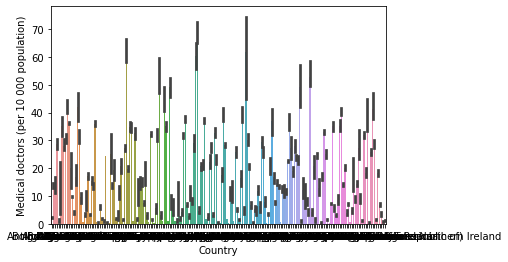

In [7]:
sns.barplot(data=df, x='Country', y='Medical doctors (per 10 000 population)')